# Classification

From lesson we learned that 3 approaches are possible for classification:
- **Discriminant function approach**: 
  + model a *function* that maps inputs to classes
  + fit model to data
- **Probabilistic discriminative approach**: 
  + model a *conditional probability* $P(C_k | x)$
  + fit model to data
- **Probabilistic generative approach**:
  + model *likelihood* $P(x | C_k)$ and *prior* $P(C_k)$
  + fit models to data
  + infer posterior $P(C_k | x) = \frac{P(C_k)P(x|C_k)}{P(x)}$

## Iris dataset for classification

In this session, we take into account again the Iris dataset.
This time we are more interested in the discrimination of the sample class, i.e., either Setosa, Versicolor or Virginica.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [2]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We do not have any metric over the space of the classes, i.e., it is not possible to order them. In this case one **could not** consider regression techniques.

Let us start with discriminating between Setosa and non-Setosa flowers according to the sepal length and width.

In [4]:
from scipy.stats import zscore
from sklearn.utils import shuffle

X = zscore(dataset[['sepal-length', 'sepal-width']].values)
t = dataset['class'].values == 'Iris-setosa'
X, t = shuffle(X, t, random_state=0) # this time we have to do it!

In [5]:
setosa = X[t]
not_setosa = X[~t]

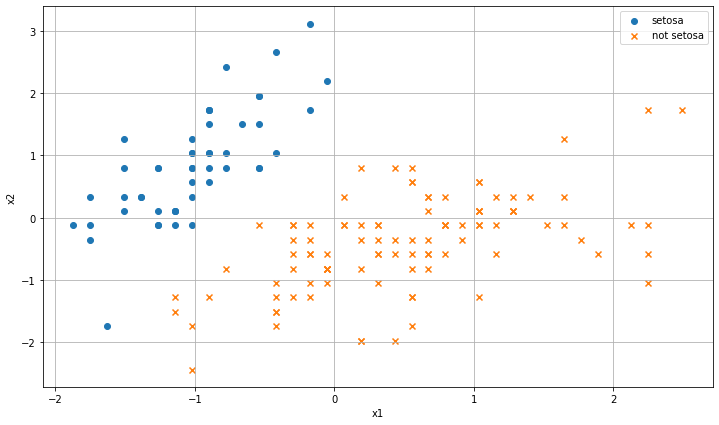

In [6]:
plt.figure(figsize=(12,7))
plt.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
plt.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()

## Discriminant Function Approach: the Perceptron

At first, let us perform a classification with a perceptron classifier:
- Hypothesis space: $y(\mathbf{x}_n) = sgn(\mathbf{w}^T \mathbf{x}_n) = sgn(w_0 + x_{n1} w_1 + x_{n2} w_2)$;
- Loss measure: Distance of misclassified points from the separating surface $L_P(\mathbf{w}) = -\sum_{n \in \mathcal{M}} \mathbf{w}^T \mathbf{x}_n C_n$;
- Optimization method: Online Gradient Descent;

where $sgn(\cdot)$ is the sign function.

In [7]:
from sklearn.linear_model import Perceptron
perc_classifier = Perceptron(alpha=1, shuffle=False, random_state=0)
perc_classifier.fit(X, t)

Perceptron(alpha=1, shuffle=False)

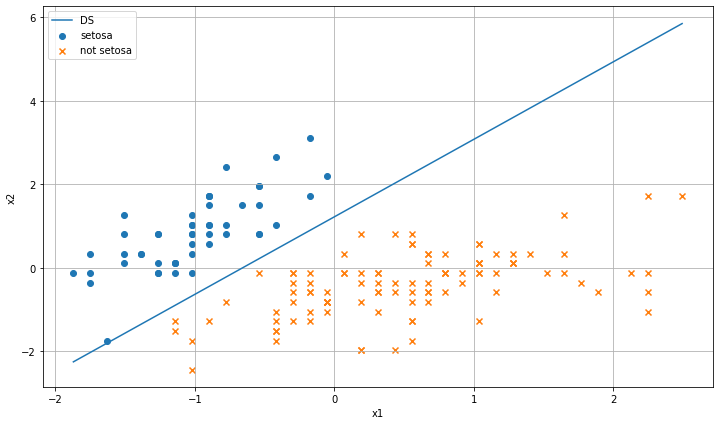

In [8]:
plt.figure(figsize=(12,7))
plt.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
plt.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')

# Plot the DS

coef = perc_classifier.coef_.flatten() # weights 
w0 = perc_classifier.intercept_ # bias
w1 = coef[0]
w2 = coef[1]

step = 100
ds_x1 = np.linspace(X[:,0].min(), X[:,0].max(), step) 
# Compute x2 componenent given some x1:
# w^T x + x0 = 0 -> w0 + w1 * x1 + w2 * x2 = 0 -> x2 = - (w0 + w1*x1) / w2
ds_x2 = [-(w0 + w1*x1) / w2 for x1 in ds_x1]
plt.plot(ds_x1, ds_x2, label='DS')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()

### Evaluating Classification

To evaluate the performances of the chosen method, we need to compute the *confusion matrix* which tells us the number of points which have been correctly classified and those which have been misclassified.

 <table style="width:100%">
  <tr>
    <th>
    <center> <img src='https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg' width=300 /> </center>
    </th>
    <th>\begin{array}{|l|l|l|}
	\hline
	&\text{Actual Class: 1}	& \text{Actual Class: 0}\\
	\hline
	\text{Predicted Class: 1}	& tp	& fp\\
	\hline
	\text{Predicted Class: 0}	& fn	& tn\\
	\hline
\end{array}
</th>
  </tr>

</table> 




Based on this matrix we can evaluate:
- Accuracy: $Acc = \frac{tp + tn}{N}$ fraction of the samples correctly classified in the dataset;
- Precision $Pre = \frac{tp}{tp + fp}$ fraction of samples correctly classified in the positive class among the ones classified in the positive class;
- Recall: $Rec = \frac{tp}{tp + fn}$ fraction of samples correctly classified in the positive class among the ones belonging to the positive class;
- F1 score: $F1 = \frac{2 \cdot Pre \cdot Rec}{Pre + Rec}$ harmonic mean of the precision and recall;

where $tn$ is the number of true negatives, $fp$ is the number of false positives, $fn$ are the false negatives and $tn$ are the true negatives.
Equivalently, we can look at the meaning of Precision and Recall by looking at the figure above.

Remember that:
- The higher these figures of merits the better the algorithm is performing.
- These performance measures are **not** symmetric, but depends on the class we selected as positive.
- Depending on the **application** one might switch the classes to have measures which better evaluate the predictive power of the classifier.

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [10]:
t_pred = perc_classifier.predict(X)

In [11]:
confusion_matrix(t, t_pred)

array([[100,   0],
       [  0,  50]])

In [12]:
accuracy_score(t, t_pred)

1.0

In [13]:
precision_score(t, t_pred)

1.0

In [ ]:
recall_score(t, t_pred)

1.0

In [14]:
f1_score(t, t_pred)

1.0

### Implementing the Perceptron classifier

In [15]:
w = np.ones(3)
n_epochs = 10
for epoch in range(n_epochs):
  for i, (x_i, t_i) in enumerate(zip(X, t)):
    # correct t_i to be in {-1, 1}
    corr_t_i = 1 if t_i else -1
    ext_x = np.concatenate([np.ones(1), x_i.flatten()])
    if np.sign(w.dot(ext_x)) != corr_t_i:
      w = w + ext_x * corr_t_i

Notice that this procedure will stop if the classes are linearly separable, while it does not stop if the two classes are overlapping.

Moreover, we do not know how long the procedure will take to reach convergence.

This makes impossible to distinguish between a procedure which is *slowly converging* to a *non-linearly separable* setting.


In [16]:
# Since we would rewrite the same code, it is a good idea to write a function
def plot_ds(X, w, step=100, label='DS'):
  ds_x1 = np.linspace(X[:,0].min(), X[:,0].max(), step) 
  ds_x2 = [-(w[0] + w[1]*x1) / w[2] for x1 in ds_x1]
  plt.plot(ds_x1, ds_x2, label=label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # This is added back by InteractiveShellApp.init_path()


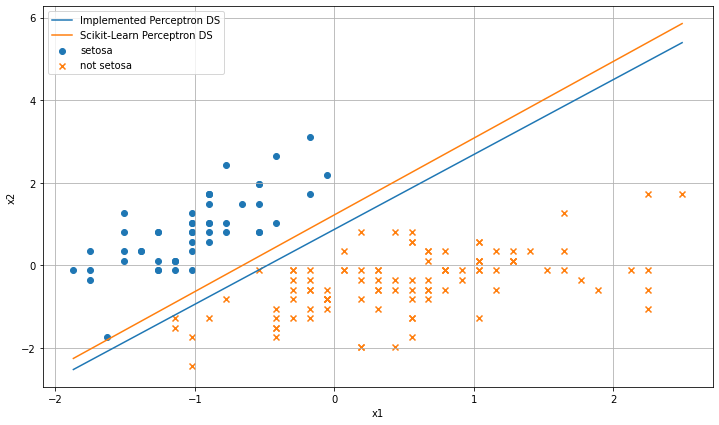

In [17]:
plt.figure(figsize=(12,7))
plt.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
plt.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')

# Implemented Perceptron
plot_ds(X, w, label='Implemented Perceptron DS')

# Sklearn Perceptron
coef = perc_classifier.coef_.flatten() # weights 
w0 = perc_classifier.intercept_ # bias
perc_w = np.array([w0, coef[0], coef[1]])
plot_ds(X, perc_w, label='Scikit-Learn Perceptron DS')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()

## Probabilistic Discriminative Approach: Logistic Regression

Let us change the methods for the classification task and use a Logistic regression classifier with two classes:
- Hypothesis space: $y_n = y(x_n) = \sigma(w_0 + x_{n1} w_1 + x_{n2} w_2)$;
- Loss measure: Loglikelihood $L(\mathbf{w}) = -\sum_{n=1}^N  [C_n \ln y_n + (1 - C_n) \ln (1 - y_n)]$;
- Optimization method: Gradient Descent;

where the sigmoid function is defined as $\sigma(x) = \frac{1}{1 + e^{-x}}$.

In [18]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(penalty='none') # regularization is applied as default
log_classifier.fit(X, t)

LogisticRegression(penalty='none')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


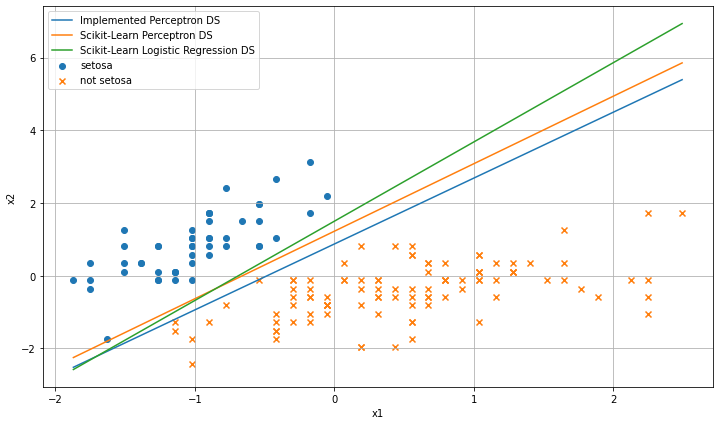

In [19]:
# compare perceptron, by hand and logistic regression
plt.figure(figsize=(12,7))
plt.scatter(setosa[:, 0], setosa[:, 1], label='setosa')
plt.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', marker='x')

# Implemented Perceptron
plot_ds(X, w, label='Implemented Perceptron DS')

# Sklearn Perceptron
coef = perc_classifier.coef_.flatten() # weights 
w0 = perc_classifier.intercept_ # bias
perc_w = np.array([w0, coef[0], coef[1]])
plot_ds(X, perc_w, label='Scikit-Learn Perceptron DS')

# Sklearn Logistic Regression
coef = log_classifier.coef_.flatten() # weights 
w0 = log_classifier.intercept_ # bias
log_w = np.array([w0, coef[0], coef[1]])
plot_ds(X, log_w, label='Scikit-Learn Logistic Regression DS')

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()

If we perform the $logit(x) = \log(\frac{x}{1-x})$ transformation to the output we have:
$$ logit(y_n) = w_0 + x_{n1} w_1 + x_{n2} w_2,$$
and, thus, we have the same statistical characterization of the parameters $\mathbf{w}$ as we had in the linear regression if we consider as output a specific transformation of the target, i.e., we can perform hypothesis testing on the significance of the parameters.

### Multiple Classes

In [20]:
multi_t = dataset['class']
multi_log_classifier = LogisticRegression()
multi_log_classifier.fit(X, multi_t)

LogisticRegression()

## Probabilistic Generative Approach: Naive Bayes

Generative models have the purpose of modeling the joint pdf of the couple input/output $p(C_k,\mathbf{x})$, which allows us to generate also **new data** from what we learned.

This is different from the probabilistic discriminative models, in which we are only interested in computing the probabilities that a given input is coming from a specific class $p(C_k | \mathbf{x})$, which is not sufficient to produce new samples.

Conversely, we will see how it is possible to generate new samples if we are provided with an approximation of the joint input/output distribution $p(C_k,\mathbf{x})$.

In this case, the Naive Bayes method considers the **naive assumption** that each input is conditionally (w.r.t. the class) independent from each other.
If we consider the Bayes formula we have: 
\begin{align*}
	& p(C_k | \mathbf{x}) = \frac{p(C_k) \ p(\mathbf{x} | C_k)}{p(\mathbf{x})} \\
	& \propto p(x_1, \ldots, x_M, C_k)\\
	& = p(x_1 | x_2, \ldots, x_M, C_k) p(x_2, \ldots, x_M, C_k) \\
	& = p(x_1 | x_2, \ldots, x_M, C_k) p(x_2 | x_3, \ldots, x_M, C_k) p(x_3, \ldots, x_n, C_k) \\
	& = p(x_1 \vert x_2, \ldots, x_M, C_k) \ldots p(x_M | C_k) p(C_k) \\
	& = p(x_1 \vert C_k) \ldots p(x_M | C_k) p(C_k) \\
	& = p(C_k) \prod_{j=1}^M p(x_j | C_k).
\end{align*}

The decision function, which maximises the Maximum A Posteriori probability, is the following:
\begin{equation*}
	y(\mathbf{x}) = \arg \max_k p(C_k) \prod_{j=1}^M p(x_j | C_k),
\end{equation*}
where as usual we do not consider the normalization factor $p(\mathbf{x})$.

In a specific case we have to define a prior distribution for the classes $p(C_k) \ \forall k$ and a distribution to compute the likelihood of the considered samples $p(x_j | C_k) \ \forall J, \ \forall k$.

In the case of continuous variable one of the usual assumption is to use Gaussian distributions for each variable $p(x_j | C_k) = \mathcal{N}(x_j;\mu_{jk},\sigma^2_{jk})$ and either a uniform prior $p(C_k) = \frac{1}{K}$ or a multinomial prior based on the samples proportions $p(C_k) = \frac{\sum_{i=1}^N I \{\mathbf{x}_n \in C_k \}}{N}$, where $I\{\cdot\}$ is the indicator function.

The complete model of Naive Bayes is:
- Hypothesis space: $y_n = y(x_n) = \arg \max_k p(C_k) \prod_{j=1}^M p(x_j | C_k)$;
- Loss measure: Log likelihood;
- Optimization method: MLE.


In [21]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X, t)
t_pred = gnb_classifier.predict(X)

print(accuracy_score(t, t_pred))
print(recall_score(t, t_pred))
print(precision_score(t, t_pred))
print(confusion_matrix(t, t_pred))

0.9933333333333333
0.98
1.0
[[100   0]
 [  1  49]]


### Generate new data

Using the estimated priors $p(C_k)$ and likelihoods $p(x_j | C_k) = \mathcal{N}(x_j;\mu_{jk},\sigma^2_{jk})$ it is possible to generate new data.


In [22]:
N = 100

new_samples = np.empty((N, 2))
new_t = np.empty(N, dtype=bool)

for i in range(N):
  # Based on the class priors, we sample a class
  class_ = np.random.choice([0,1], p=gnb_classifier.class_prior_)
  new_t[i] = class_
  
  # For each feature, we have a normal distribution of its likelihood given the class
  
  # theta: mean of each feature per class (n_classes, n_features)
  thetas = gnb_classifier.theta_[class_, :]

  # sigma: variance of each feature per class (n_classes, n_features)
  sigmas = gnb_classifier.sigma_[class_, :]

  # sample x1
  new_samples[i,0] = np.random.normal(thetas[0], sigmas[0], 1)
  # sample x2
  new_samples[i,1] = np.random.normal(thetas[1], sigmas[1], 1)

# divide samples by class
new_setosa = new_samples[new_t, :]
new_not_setosa = new_samples[~new_t, :]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


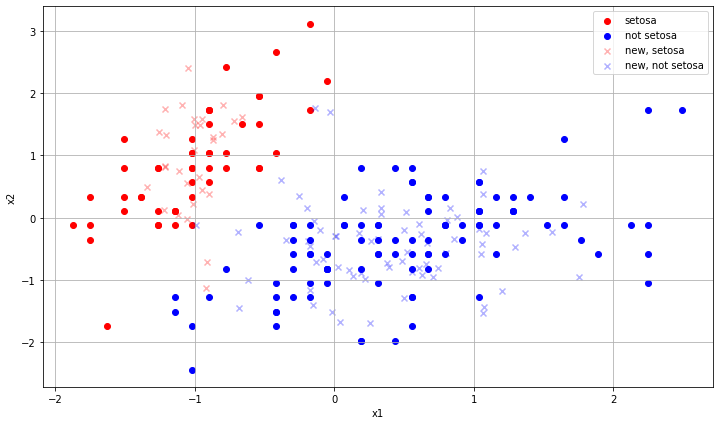

In [23]:
plt.figure(figsize=(12,7))

# plot real samples
plt.scatter(setosa[:, 0], setosa[:, 1], label='setosa', color='red')
plt.scatter(not_setosa[:, 0], not_setosa[:, 1], label='not setosa', color='blue')

# plot generated samples
plt.scatter(new_setosa[:, 0], new_setosa[:, 1], label='new, setosa', color='red', marker='x', alpha=0.3)
plt.scatter(new_not_setosa[:, 0], new_not_setosa[:, 1], label='new, not setosa', color='blue', marker='x', alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.legend()
plt.show()


Notice that the Naive Bayes is **not** a Bayesian method.

Indeed, the priors we compute are estimated from data, and not updated using likelihoods.

This makes Naive Bayes a method which uses the Bayes theorem to model the independence among the input, given the classes.